In [1]:
import collections
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf

In [4]:
import pickle
with open("data/algorithm_trees.pkl", 'rb') as fh:
    trees, val_trees, labels = pickle.load(fh)

with open("data/vectors.pkl", 'rb') as fh:
    embeddings, embed_lookup = pickle.load(fh)
    embedding_size = len(embeddings[0])

In [15]:
import numpy as np
#type(trees)
#len(trees)
#np.arange(len(trees))
print(len(embed_lookup))
embed_lookup

92


{'GtE': 82,
 'Mult': 63,
 'Print': 9,
 'GeneratorExp': 37,
 'arguments': 89,
 'And': 59,
 'Repr': 41,
 'BitAnd': 71,
 'ExceptHandler': 88,
 'FunctionDef': 3,
 'ClassDef': 4,
 'Yield': 38,
 'Expression': 2,
 'Assign': 7,
 'UAdd': 75,
 'IfExp': 31,
 'AugStore': 53,
 'Return': 5,
 'IsNot': 84,
 'NotIn': 86,
 'ListComp': 34,
 'While': 11,
 'DictComp': 36,
 'BoolOp': 27,
 'Mod': 65,
 'List': 47,
 'Import': 18,
 'Interactive': 1,
 'Store': 50,
 'Is': 83,
 'Set': 33,
 'In': 85,
 'Assert': 17,
 'USub': 76,
 'Tuple': 48,
 'AugLoad': 52,
 'Str': 43,
 'Break': 24,
 'Raise': 14,
 'FloorDiv': 72,
 'Gt': 81,
 'Name': 46,
 'Compare': 39,
 'NotEq': 78,
 'Exec': 20,
 'Index': 58,
 'For': 10,
 'Div': 64,
 'Attribute': 44,
 'Lambda': 30,
 'RShift': 68,
 'UnaryOp': 29,
 'AugAssign': 8,
 'LShift': 67,
 'Call': 40,
 'Load': 49,
 'Pow': 66,
 'ImportFrom': 19,
 'If': 12,
 'TryFinally': 16,
 'Subscript': 45,
 'Continue': 25,
 'Ellipsis': 55,
 'alias': 91,
 'Not': 74,
 'Dict': 32,
 'keyword': 90,
 'SetComp': 35

In [12]:
from classifier.Tbcnn import Tbcnn
model = Tbcnn(embedding_size=len(embed_lookup), conv_output_size=100, num_classes=len(labels))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

In [37]:
model.summary()

Model: "tbcnn_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 continuous_binary_tree_conv  multiple                 9100      
 _layer_11 (ContinuousBinary                                     
 TreeConvLayer)                                                  
                                                                 
 dynamic_max_pooling_layer_1  multiple                 0         
 1 (DynamicMaxPoolingLayer)                                      
                                                                 
 dense_11 (Dense)            multiple                  606       
                                                                 
Total params: 9,706
Trainable params: 9,706
Non-trainable params: 0
_________________________________________________________________


In [14]:
from generator.DataGenerator import DataGenerator
training_generator = DataGenerator(trees, labels, embeddings, embed_lookup, batch_size=1, shuffle=True)
validation_generator = DataGenerator(val_trees, labels, embeddings, embed_lookup, batch_size=1, shuffle=False)
model.fit(training_generator, validation_data=validation_generator, epochs=2)

Epoch 1/2
392/392 [==============================] - 21s 53ms/step - loss: 0.0153 - categorical_accuracy: 1.0000 - val_loss: 0.0130 - val_categorical_accuracy: 1.0000
Epoch 2/2
392/392 [==============================] - 21s 53ms/step - loss: 0.0112 - categorical_accuracy: 1.0000 - val_loss: 0.0098 - val_categorical_accuracy: 1.0000


In [12]:
#model.predict(batch_samples(gen_samples(val_trees, labels, embeddings, embed_lookup, 10), 1))
metrics = model.evaluate(validation_generator)
#print(metrics)

894/894 [==============================] - 5s 5ms/step - loss: 0.0198 - categorical_accuracy: 1.0000


# Dataset Creation

In [3]:
from sampler.Sampler import Sampler
source_file = 'C:\\Users\\sebas\\Documents\\Masterarbeit\\custom_python_dataset\\python_dataset.csv'
train_dir = 'C:\\Users\\sebas\\Documents\\Masterarbeit\\custom_python_dataset\\train'
val_dir = 'C:\\Users\\sebas\\Documents\\Masterarbeit\\custom_python_dataset\\val'
test_dir = 'C:\\Users\\sebas\\Documents\\Masterarbeit\\custom_python_dataset\\test'
sampler = Sampler(source_file, train_dir, val_dir, test_dir)
pids_labels = sampler.setup_data()
pids_labels

<StringArray>
['p02717', 'p02718', 'p02719', 'p02723', 'p02724', 'p02725', 'p02729',
 'p02730', 'p02731', 'p02753',
 ...
 'p03455', 'p03470', 'p03471', 'p03478', 'p03493', 'p03494', 'p03545',
 'p03835', 'p04043', 'p04044']
Length: 126, dtype: string

In [4]:
sampler.create_trees()

In [5]:
node_set = sampler.get_node_type_set()
d = dict([(y,x+1) for x,y in enumerate(sorted(node_set))])
d

{'Add': 1,
 'And': 2,
 'Assert': 3,
 'Assign': 4,
 'Attribute': 5,
 'AugAssign': 6,
 'BinOp': 7,
 'BitAnd': 8,
 'BitOr': 9,
 'BitXor': 10,
 'BoolOp': 11,
 'Break': 12,
 'Call': 13,
 'ClassDef': 14,
 'Compare': 15,
 'Constant': 16,
 'Continue': 17,
 'Del': 18,
 'Delete': 19,
 'Dict': 20,
 'DictComp': 21,
 'Div': 22,
 'Eq': 23,
 'ExceptHandler': 24,
 'Expr': 25,
 'FloorDiv': 26,
 'For': 27,
 'FunctionDef': 28,
 'GeneratorExp': 29,
 'Global': 30,
 'Gt': 31,
 'GtE': 32,
 'If': 33,
 'IfExp': 34,
 'Import': 35,
 'ImportFrom': 36,
 'In': 37,
 'Invert': 38,
 'Is': 39,
 'IsNot': 40,
 'LShift': 41,
 'Lambda': 42,
 'List': 43,
 'ListComp': 44,
 'Load': 45,
 'Lt': 46,
 'LtE': 47,
 'Mod': 48,
 'Module': 49,
 'Mult': 50,
 'Name': 51,
 'Nonlocal': 52,
 'Not': 53,
 'NotEq': 54,
 'NotIn': 55,
 'Or': 56,
 'Pass': 57,
 'Pow': 58,
 'RShift': 59,
 'Raise': 60,
 'Return': 61,
 'Set': 62,
 'SetComp': 63,
 'Slice': 64,
 'Starred': 65,
 'Store': 66,
 'Sub': 67,
 'Subscript': 68,
 'Try': 69,
 'Tuple': 70,
 'UAd

In [9]:
import pickle
with open('C:\\Users\\sebas\\Documents\\Masterarbeit\\custom_python_dataset\\node_int_map.pkl', 'rb') as f:
    d1 = pickle.load(f)
d1

{'Add': 1,
 'And': 2,
 'Assert': 3,
 'Assign': 4,
 'Attribute': 5,
 'AugAssign': 6,
 'BinOp': 7,
 'BitAnd': 8,
 'BitOr': 9,
 'BitXor': 10,
 'BoolOp': 11,
 'Break': 12,
 'Call': 13,
 'ClassDef': 14,
 'Compare': 15,
 'Constant': 16,
 'Continue': 17,
 'Del': 18,
 'Delete': 19,
 'Dict': 20,
 'DictComp': 21,
 'Div': 22,
 'Eq': 23,
 'ExceptHandler': 24,
 'Expr': 25,
 'FloorDiv': 26,
 'For': 27,
 'FunctionDef': 28,
 'GeneratorExp': 29,
 'Global': 30,
 'Gt': 31,
 'GtE': 32,
 'If': 33,
 'IfExp': 34,
 'Import': 35,
 'ImportFrom': 36,
 'In': 37,
 'Invert': 38,
 'Is': 39,
 'IsNot': 40,
 'LShift': 41,
 'Lambda': 42,
 'List': 43,
 'ListComp': 44,
 'Load': 45,
 'Lt': 46,
 'LtE': 47,
 'Mod': 48,
 'Module': 49,
 'Mult': 50,
 'Name': 51,
 'Nonlocal': 52,
 'Not': 53,
 'NotEq': 54,
 'NotIn': 55,
 'Or': 56,
 'Pass': 57,
 'Pow': 58,
 'RShift': 59,
 'Raise': 60,
 'Return': 61,
 'Set': 62,
 'SetComp': 63,
 'Slice': 64,
 'Starred': 65,
 'Store': 66,
 'Sub': 67,
 'Subscript': 68,
 'Try': 69,
 'Tuple': 70,
 'UAd

In [6]:
import pandas as pd
pd.read_csv(source_file, index_col='id', header=0).astype({'problem_id': 'string'})

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status_x,cpu_time,memory,code_size,accuracy,status_y,count
id,,,,,,,,,,,,,,
0,s005016393,p02717,u768256617,1589420406,Python,Python (3.4.3),py,Accepted,17.0,2940.0,43,NaN,Accepted,3678
1,s608165181,p02717,u963747475,1589417775,Python,Python (3.4.3),py,Accepted,17.0,2940.0,60,NaN,Accepted,3678
2,s714131858,p02717,u523087093,1589416633,Python,Python (3.4.3),py,Accepted,17.0,2940.0,40,NaN,Accepted,3678
3,s171581194,p02717,u763534217,1589415736,Python,Python (3.4.3),py,Accepted,17.0,3060.0,154,NaN,Accepted,3678
4,s990450823,p02717,u242890210,1589406178,Python,Python (3.4.3),py,Accepted,17.0,2940.0,155,NaN,Accepted,3678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376205,s636390466,p04044,u496694349,1469322410,Python,Python (3.4.3),py,Accepted,1405.0,7528.0,111,NaN,Accepted,2659
376206,s083855876,p04044,u442984321,1469322350,Python,Python (3.4.3),py,Accepted,1972.0,7272.0,118,NaN,Accepted,2659
376207,s483453628,p04044,u620084012,1469322273,Python,Python (3.4.3),py,Accepted,38.0,3064.0,95,NaN,Accepted,2659


In [9]:
from classifier.Tbcnn import Tbcnn
model = Tbcnn(embedding_size=len(d), conv_output_size=100, num_classes=len(pids_labels))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

['mergesort', 'linkedlist', 'quicksort', 'bfs', 'bubblesort', 'knapsack']

In [10]:
import glob
from classifier.generators.FileStreamDataGenerator import FileStreamDataGenerator
train_files = glob.glob(train_dir + "\\*.pkl")
val_files = glob.glob(val_dir + "\\*.pkl")
embeddings = []
training_generator = FileStreamDataGenerator(train_files, pids_labels, embeddings, d, batch_size=1, shuffle=True)
validation_generator = FileStreamDataGenerator(val_files, pids_labels, embeddings, d, batch_size=1, shuffle=False)
model.fit(training_generator, validation_data=validation_generator, epochs=1)

75600/75600 [==============================] - 153s 2ms/step - loss: 0.6265 - categorical_accuracy: 0.8493 - val_loss: 0.2781 - val_categorical_accuracy: 0.9231


In [34]:
model.argmax

<tf.Tensor 'tbcnn_1/dynamic_max_pooling_layer_1/ArgMax:0' shape=(None, 100) dtype=int64>

In [ ]:
import glob

print(glob.glob(val_dir + "\\*.pkl"))

In [57]:
foo = [[[1,6,3], [1,2,4], [2,1,1], [9,1,1]], [[1,1,1], [1,1,1], [1,1,1], [0,0,0]]]

tf.reduce_max(foo, axis=1)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[9, 6, 4],
       [1, 1, 1]])>

In [58]:
tf.argmax(foo, axis=1)

<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[3, 0, 1],
       [0, 0, 0]], dtype=int64)>

In [45]:
training_generator.__getitem__(1)

([array([[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]),
  array([[[1, 2, 0, ..., 0, 0, 0],
          [3, 4, 5, ..., 0, 0, 0],
          [7, 8, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]])],
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [127]:
validation_generator.__getitem__(1300)

([array([[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]),
  array([[[ 1,  2,  3, ...,  5,  6,  7],
          [ 8,  9,  0, ...,  0,  0,  0],
          [10, 11,  0, ...,  0,  0,  0],
          ...,
          [ 0,  0,  0, ...,  0,  0,  0],
          [ 0,  0,  0, ...,  0,  0,  0],
          [ 0,  0,  0, ...,  0,  0,  0]]])],
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 

In [1]:
x = model.conv_layer(validation_generator.__getitem__(1300)[0])

NameError: name 'model' is not defined

In [151]:
val_files[1300]

'C:\\Users\\sebas\\Documents\\Masterarbeit\\custom_python_dataset\\val\\11167.pkl'

In [152]:
node_importance = model.pooling_layer(x)[0]

In [153]:
node_importance.numpy().tolist()[0]

[124,
 56,
 35,
 71,
 45,
 124,
 124,
 23,
 15,
 35,
 73,
 124,
 91,
 61,
 71,
 83,
 5,
 36,
 15,
 71,
 124,
 71,
 45,
 45,
 21,
 43,
 45,
 35,
 46,
 124,
 36,
 56,
 16,
 0,
 124,
 15,
 61,
 50,
 20,
 15,
 23,
 83,
 16,
 73,
 34,
 62,
 62,
 124,
 35,
 71,
 16,
 91,
 61,
 88,
 21,
 34,
 83,
 124,
 61,
 124,
 88,
 34,
 0,
 91,
 50,
 0,
 0,
 36,
 0,
 36,
 62,
 45,
 6,
 36,
 71,
 70,
 88,
 45,
 21,
 124,
 13,
 16,
 88,
 114,
 5,
 62,
 0,
 23,
 17,
 21,
 6,
 62,
 45,
 6,
 124,
 124,
 36,
 101,
 6,
 88]

In [154]:
from collections import Counter

node_importance_list = node_importance.numpy().tolist()[0]
counter = Counter(node_importance_list)
counter

Counter({124: 13,
         56: 2,
         35: 4,
         71: 6,
         45: 7,
         23: 3,
         15: 4,
         73: 2,
         91: 3,
         61: 4,
         83: 3,
         5: 2,
         36: 6,
         21: 4,
         43: 1,
         46: 1,
         16: 4,
         0: 6,
         50: 2,
         20: 1,
         34: 3,
         62: 5,
         88: 5,
         6: 4,
         70: 1,
         13: 1,
         114: 1,
         17: 1,
         101: 1})

In [52]:
x

<tf.Tensor: shape=(1, 31, 100), dtype=float32, numpy=
array([[[-0.9822311 , -0.9416436 , -0.91100544, ..., -0.82626104,
         -0.9454457 , -0.9691253 ],
        [-0.996443  , -0.98770875, -0.8836895 , ..., -0.9597776 ,
         -0.9643619 , -0.97884893],
        [-0.97898716, -0.90307903, -0.87915605, ..., -0.76761687,
         -0.9202089 , -0.96007055],
        ...,
        [-0.96722335, -0.8733561 , -0.8511067 , ..., -0.6766271 ,
         -0.9222235 , -0.9584226 ],
        [-0.9737216 , -0.8845737 , -0.85663795, ..., -0.76879   ,
         -0.9235089 , -0.95930225],
        [-0.96722335, -0.8733561 , -0.8511067 , ..., -0.6766271 ,
         -0.9222235 , -0.9584226 ]]], dtype=float32)>

In [2]:
import pickle
with open('C:\\Users\\sebas\\Documents\\Masterarbeit\\custom_python_dataset\\val\\11167.pkl', 'rb') as f:
    val_file = pickle.load(f)

In [3]:
val_file

{'tree': {'node': 'Module',
  'children': [{'node': 'Assign',
    'children': [{'node': 'Name',
      'children': [{'node': 'Store', 'children': []}]},
     {'node': 'Call',
      'children': [{'node': 'Name',
        'children': [{'node': 'Load', 'children': []}]},
       {'node': 'Call',
        'children': [{'node': 'Name',
          'children': [{'node': 'Load', 'children': []}]}]}]}]},
   {'node': 'Assign',
    'children': [{'node': 'Name',
      'children': [{'node': 'Store', 'children': []}]},
     {'node': 'Call',
      'children': [{'node': 'Name',
        'children': [{'node': 'Load', 'children': []}]},
       {'node': 'Call',
        'children': [{'node': 'Name',
          'children': [{'node': 'Load', 'children': []}]},
         {'node': 'Name', 'children': [{'node': 'Load', 'children': []}]},
         {'node': 'Call',
          'children': [{'node': 'Attribute',
            'children': [{'node': 'Call',
              'children': [{'node': 'Name',
                'children'

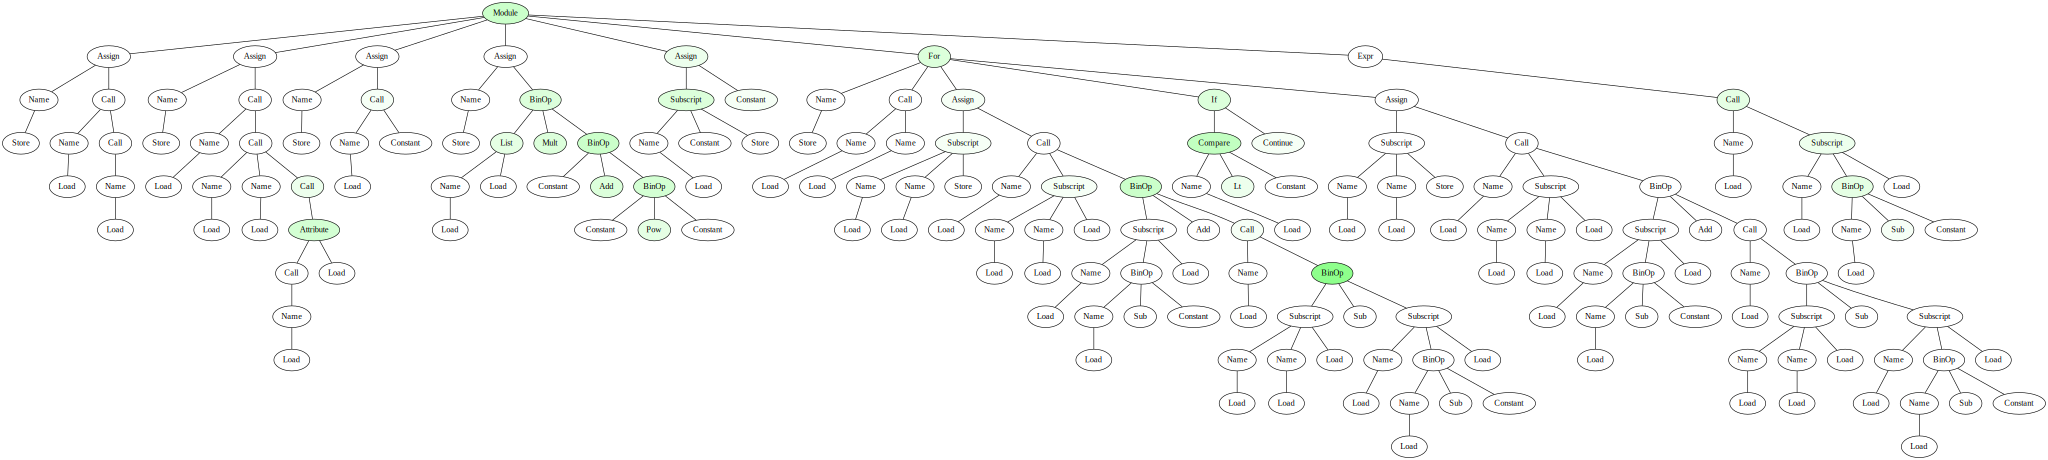

In [156]:
from visualization.GraphvizVisualizer import GraphvizVisualizer

vis = GraphvizVisualizer()
vis.visualizeAst(val_file, counter)

In [16]:
import ast
tree = ast.parse("n = int(input())\nH = list(map(int,input().split()))\ninf = float('INF')\ndp = [inf]*n\ndp[0] = 0\nfor i in range(1,n):\n    if i != 1:dp[i]=min(dp[i],dp[i-2]+abs(H[i]-H[i-2]))\n    dp[i]=min(dp[i],dp[i-1]+abs(H[i]-H[i-1]))\nprint(dp[-1])")

In [7]:
def create_json_tree(tree):
    n_nodes = 1
    queue = [tree]
    node_type = type(tree).__name__
    root_json = {
        "node": node_type,
        "children": []
    }
    queue_json = [root_json]
    while queue:
        current_node = queue.pop(0)
        n_nodes += 1
        current_node_json = queue_json.pop(0)

        children = list(ast.iter_child_nodes(current_node))
        queue.extend(children)
        for child in children:
            node_type = type(child).__name__
            child_json = {
                "node": node_type,
                "children": []
            }

            current_node_json['children'].append(child_json)
            queue_json.append(child_json)

    return root_json, n_nodes

In [17]:
create_json_tree(tree)

({'node': 'Module',
  'children': [{'node': 'Assign',
    'children': [{'node': 'Name',
      'children': [{'node': 'Store', 'children': []}]},
     {'node': 'Call',
      'children': [{'node': 'Name',
        'children': [{'node': 'Load', 'children': []}]},
       {'node': 'Call',
        'children': [{'node': 'Name',
          'children': [{'node': 'Load', 'children': []}]}]}]}]},
   {'node': 'Assign',
    'children': [{'node': 'Name',
      'children': [{'node': 'Store', 'children': []}]},
     {'node': 'Call',
      'children': [{'node': 'Name',
        'children': [{'node': 'Load', 'children': []}]},
       {'node': 'Call',
        'children': [{'node': 'Name',
          'children': [{'node': 'Load', 'children': []}]},
         {'node': 'Name', 'children': [{'node': 'Load', 'children': []}]},
         {'node': 'Call',
          'children': [{'node': 'Attribute',
            'children': [{'node': 'Call',
              'children': [{'node': 'Name',
                'children': [{'nod

# Setup

First we create an in-memory representation of the CodeNet dataset

In [2]:
from dataset.CodeNet import CodeNet
codenet = CodeNet(location=r"C:\Users\sebas\Documents\Masterarbeit\Project_CodeNet")

In [3]:
submission_metadata = codenet.getSubmissionMetadata()

In [4]:
submission_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13916868 entries, 0 to 1088
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   submission_id      string
 1   problem_id         string
 2   user_id            string
 3   date               Int64 
 4   language           string
 5   original_language  string
 6   filename_ext       string
 7   status             string
 8   cpu_time           Int64 
 9   memory             Int64 
 10  code_size          Int64 
 11  accuracy           string
dtypes: Int64(4), string(8)
memory usage: 1.4 GB


Next we create a derived dataset with from all accepted Python 3.4.3 submissions

In [5]:
accepted_python3_submissions = submission_metadata.query("original_language == 'Python (3.4.3)' and status == 'Accepted'")

We are interested in problems with > 2500 submissions, so we have enough files for training, validation and testing

In [6]:
python3_submissions_count = accepted_python3_submissions.groupby(["problem_id", "status"]).size().reset_index(name="count").sort_values("count", ascending=False).query("count > 2500")

In [127]:
derived_dataset = accepted_python3_submissions.merge(python3_submissions_count, on="problem_id").drop(columns=["status_y"]).rename(columns={"status_x": "status"})

In [14]:
derived_dataset.to_csv(r"C:\Users\sebas\Documents\Masterarbeit\datasets\tbcnn_py3_2500\dataset.csv")

In [128]:
from dataset.ProblemIdClassificationDataset import ProblemIdClassificationDataset

derived_dataset = ProblemIdClassificationDataset(r"C:\Users\sebas\Documents\Masterarbeit\datasets\tbcnn_py3_2500",
                                                 derived_dataset,
                                                 codenet,
                                                 n_train_per_problem=600,
                                                 n_val_per_problem=100,
                                                 n_test_per_problem=300)

In [129]:
derived_dataset.create()

In [48]:
derived_dataset.get_labels()

<StringArray>
['p02717', 'p02718', 'p02719', 'p02723', 'p02724', 'p02725', 'p02729',
 'p02730', 'p02731', 'p02753',
 ...
 'p03455', 'p03470', 'p03471', 'p03478', 'p03493', 'p03494', 'p03545',
 'p03835', 'p04043', 'p04044']
Length: 126, dtype: string

In [49]:
derived_dataset.get_node_map()

{'Add': 1,
 'And': 2,
 'Assert': 3,
 'Assign': 4,
 'Attribute': 5,
 'AugAssign': 6,
 'BinOp': 7,
 'BitAnd': 8,
 'BitOr': 9,
 'BitXor': 10,
 'BoolOp': 11,
 'Break': 12,
 'Call': 13,
 'ClassDef': 14,
 'Compare': 15,
 'Constant': 16,
 'Continue': 17,
 'Del': 18,
 'Delete': 19,
 'Dict': 20,
 'DictComp': 21,
 'Div': 22,
 'Eq': 23,
 'ExceptHandler': 24,
 'Expr': 25,
 'FloorDiv': 26,
 'For': 27,
 'FunctionDef': 28,
 'GeneratorExp': 29,
 'Global': 30,
 'Gt': 31,
 'GtE': 32,
 'If': 33,
 'IfExp': 34,
 'Import': 35,
 'ImportFrom': 36,
 'In': 37,
 'Invert': 38,
 'Is': 39,
 'IsNot': 40,
 'LShift': 41,
 'Lambda': 42,
 'List': 43,
 'ListComp': 44,
 'Load': 45,
 'Lt': 46,
 'LtE': 47,
 'Mod': 48,
 'Module': 49,
 'Mult': 50,
 'Name': 51,
 'Not': 52,
 'NotEq': 53,
 'NotIn': 54,
 'Or': 55,
 'Pass': 56,
 'Pow': 57,
 'RShift': 58,
 'Raise': 59,
 'Return': 60,
 'Set': 61,
 'SetComp': 62,
 'Slice': 63,
 'Starred': 64,
 'Store': 65,
 'Sub': 66,
 'Subscript': 67,
 'Try': 68,
 'Tuple': 69,
 'UAdd': 70,
 'USub': 

In [143]:
import tensorflow as tf
from classifier.Tbcnn import Tbcnn
node_map = derived_dataset.get_node_map()
labels = derived_dataset.get_labels()
model = Tbcnn(embedding_size=len(node_map), conv_output_size=100, num_classes=len(labels))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

In [144]:
from classifier.generators.FileStreamDataGenerator import FileStreamDataGenerator
train_files = derived_dataset.get_train_files()
val_files = derived_dataset.get_val_files()
embeddings = []
training_generator = FileStreamDataGenerator(train_files, labels, embeddings, node_map, batch_size=1, shuffle=True)
validation_generator = FileStreamDataGenerator(val_files, labels, embeddings, node_map, batch_size=1, shuffle=False)
model.fit(training_generator, validation_data=validation_generator, epochs=1)

75600/75600 [==============================] - 150s 2ms/step - loss: 0.6474 - categorical_accuracy: 0.8463 - val_loss: 0.2880 - val_categorical_accuracy: 0.9203


In [145]:
val_files[1300]

'C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\tbcnn_py3_2500\\val\\11167.pkl'

In [146]:
x = model.conv_layer(validation_generator.__getitem__(1300)[0])

In [147]:
node_importance = model.pooling_layer(x)[0]

In [57]:
node_importance.numpy().tolist()[0]

[47,
 0,
 0,
 45,
 0,
 30,
 45,
 39,
 45,
 6,
 73,
 0,
 39,
 39,
 21,
 53,
 3,
 61,
 39,
 29,
 69,
 69,
 30,
 61,
 89,
 115,
 39,
 48,
 4,
 5,
 78,
 29,
 60,
 69,
 73,
 39,
 6,
 0,
 44,
 14,
 1,
 69,
 39,
 17,
 39,
 39,
 29,
 73,
 13,
 6,
 13,
 39,
 39,
 39,
 4,
 6,
 15,
 69,
 69,
 73,
 6,
 30,
 5,
 115,
 48,
 13,
 0,
 7,
 115,
 69,
 73,
 69,
 39,
 6,
 6,
 30,
 39,
 73,
 30,
 4,
 39,
 3,
 69,
 4,
 29,
 6,
 30,
 39,
 0,
 15,
 30,
 73,
 13,
 61,
 69,
 4,
 14,
 6,
 30,
 5]

In [148]:
from collections import Counter

node_importance_list = node_importance.numpy().tolist()[0]
counter = Counter(node_importance_list)
counter

Counter({122: 2,
         3: 4,
         44: 4,
         70: 1,
         54: 16,
         16: 7,
         0: 8,
         58: 4,
         8: 10,
         21: 4,
         1: 1,
         27: 1,
         88: 6,
         7: 4,
         45: 3,
         79: 3,
         97: 2,
         46: 2,
         9: 1,
         6: 5,
         30: 2,
         63: 1,
         15: 2,
         78: 1,
         22: 3,
         102: 2,
         25: 1})

In [149]:
import pickle
with open('C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\tbcnn_py3_2500\\val\\11167.pkl', 'rb') as f:
    val_file = pickle.load(f)

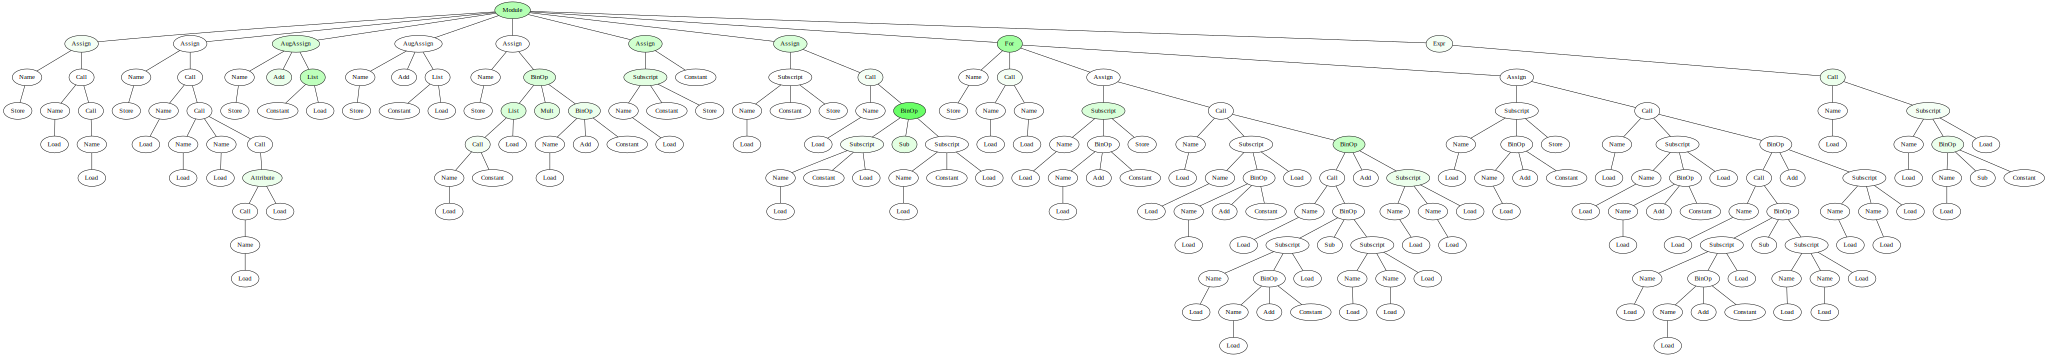

In [150]:
from visualization.GraphvizVisualizer import GraphvizVisualizer

vis = GraphvizVisualizer()
vis.visualizeAst(val_file, counter)

In [151]:
derived_dataset.val_df.iloc[[11167]]

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy,count
11167,s528421428,p03160,u440161695,1587376238,Python,Python (3.4.3),py,Accepted,163,13980,240,<NA>,2804


In [152]:
codenet.get_src_path_of_submissions(list(derived_dataset.val_df.iloc[[11167]]["submission_id"].values))

{'s528421428': 'C:\\Users\\sebas\\Documents\\Masterarbeit\\Project_CodeNet\\data\\p03160\\Python\\s528421428.py'}

In [153]:
val_file

{'tree': {'node': 'Module',
  'children': [{'node': 'Assign',
    'children': [{'node': 'Name',
      'children': [{'node': 'Store', 'children': []}]},
     {'node': 'Call',
      'children': [{'node': 'Name',
        'children': [{'node': 'Load', 'children': []}]},
       {'node': 'Call',
        'children': [{'node': 'Name',
          'children': [{'node': 'Load', 'children': []}]}]}]}]},
   {'node': 'Assign',
    'children': [{'node': 'Name',
      'children': [{'node': 'Store', 'children': []}]},
     {'node': 'Call',
      'children': [{'node': 'Name',
        'children': [{'node': 'Load', 'children': []}]},
       {'node': 'Call',
        'children': [{'node': 'Name',
          'children': [{'node': 'Load', 'children': []}]},
         {'node': 'Name', 'children': [{'node': 'Load', 'children': []}]},
         {'node': 'Call',
          'children': [{'node': 'Attribute',
            'children': [{'node': 'Call',
              'children': [{'node': 'Name',
                'children'

In [75]:
def create_json_tree(tree):
    n_nodes = 1
    queue = [tree]
    node_type = type(tree).__name__
    root_json = {
        "node": node_type,
        "children": []
    }
    queue_json = [root_json]
    while queue:
        current_node = queue.pop(0)
        n_nodes += 1
        current_node_json = queue_json.pop(0)

        children = list(ast.iter_child_nodes(current_node))
        queue.extend(children)
        for child in children:
            node_type = type(child).__name__
            child_json = {
                "node": node_type,
                "children": []
            }

            current_node_json['children'].append(child_json)
            queue_json.append(child_json)

    return root_json, n_nodes

In [155]:
import ast
with open('C:\\Users\\sebas\\Documents\\Masterarbeit\\Project_CodeNet\\data\\p03160\\Python\\s528421428.py', encoding='utf-8') as f:
    tree = ast.parse(f.read(), filename='C:\\Users\\sebas\\Documents\\Masterarbeit\\Project_CodeNet\\data\\p03160\\Python\\s528421428.py')
create_json_tree(tree)

({'node': 'Module',
  'children': [{'node': 'Assign',
    'children': [{'node': 'Name',
      'children': [{'node': 'Store', 'children': []}]},
     {'node': 'Call',
      'children': [{'node': 'Name',
        'children': [{'node': 'Load', 'children': []}]},
       {'node': 'Call',
        'children': [{'node': 'Name',
          'children': [{'node': 'Load', 'children': []}]}]}]}]},
   {'node': 'Assign',
    'children': [{'node': 'Name',
      'children': [{'node': 'Store', 'children': []}]},
     {'node': 'Call',
      'children': [{'node': 'Name',
        'children': [{'node': 'Load', 'children': []}]},
       {'node': 'Call',
        'children': [{'node': 'Name',
          'children': [{'node': 'Load', 'children': []}]},
         {'node': 'Name', 'children': [{'node': 'Load', 'children': []}]},
         {'node': 'Call',
          'children': [{'node': 'Attribute',
            'children': [{'node': 'Call',
              'children': [{'node': 'Name',
                'children': [{'nod

In [113]:
val__ = derived_dataset.val_df

In [114]:
val__.query("submission_id == 's631255534'")

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy,count
11167,s631255534,p03160,u280325247,1587840052,Python,Python (3.4.3),py,Accepted,665,147336,330,<NA>,2804


In [117]:
import pickle
with open('C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\tbcnn_py3_2500\\val\\11167.pkl', 'rb') as f:
    val_file = pickle.load(f)
val_file

{'tree': {'node': 'Module',
  'children': [{'node': 'Assign',
    'children': [{'node': 'Name',
      'children': [{'node': 'Store', 'children': []}]},
     {'node': 'Call',
      'children': [{'node': 'Name',
        'children': [{'node': 'Load', 'children': []}]},
       {'node': 'Call',
        'children': [{'node': 'Name',
          'children': [{'node': 'Load', 'children': []}]}]}]}]},
   {'node': 'Assign',
    'children': [{'node': 'Name',
      'children': [{'node': 'Store', 'children': []}]},
     {'node': 'Call',
      'children': [{'node': 'Name',
        'children': [{'node': 'Load', 'children': []}]},
       {'node': 'Call',
        'children': [{'node': 'Name',
          'children': [{'node': 'Load', 'children': []}]},
         {'node': 'Name', 'children': [{'node': 'Load', 'children': []}]},
         {'node': 'Call',
          'children': [{'node': 'Attribute',
            'children': [{'node': 'Call',
              'children': [{'node': 'Name',
                'children'

In [156]:
derived_dataset.val_df.iloc[[11167]]

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy,count
11167,s528421428,p03160,u440161695,1587376238,Python,Python (3.4.3),py,Accepted,163,13980,240,<NA>,2804


In [119]:
import ast
with open('C:\\Users\\sebas\\Documents\\Masterarbeit\\Project_CodeNet\\data\\p03160\\Python\\s631255534.py', encoding='utf-8') as f:
    tree = ast.parse(f.read(), filename='C:\\Users\\sebas\\Documents\\Masterarbeit\\Project_CodeNet\\data\\p03160\\Python\\s631255534.py')
create_json_tree(tree)

({'node': 'Module',
  'children': [{'node': 'Import',
    'children': [{'node': 'alias', 'children': []}]},
   {'node': 'ImportFrom', 'children': [{'node': 'alias', 'children': []}]},
   {'node': 'Expr',
    'children': [{'node': 'Call',
      'children': [{'node': 'Attribute',
        'children': [{'node': 'Name',
          'children': [{'node': 'Load', 'children': []}]},
         {'node': 'Load', 'children': []}]},
       {'node': 'BinOp',
        'children': [{'node': 'Constant', 'children': []},
         {'node': 'Pow', 'children': []},
         {'node': 'Constant', 'children': []}]}]}]},
   {'node': 'Assign',
    'children': [{'node': 'Name',
      'children': [{'node': 'Store', 'children': []}]},
     {'node': 'Call',
      'children': [{'node': 'Name',
        'children': [{'node': 'Load', 'children': []}]},
       {'node': 'Call',
        'children': [{'node': 'Name',
          'children': [{'node': 'Load', 'children': []}]}]}]}]},
   {'node': 'Assign',
    'children': [{'node'

In [139]:
for index, row in val__.iterrows():
    print(str(index) + "-" + row["submission_id"])

0-s840519746
1-s534215088
2-s709776076
3-s477405653
4-s263955412
5-s990899766
6-s580096068
7-s162515057
8-s184904283
9-s257395658
10-s830236538
11-s060984706
12-s761987503
13-s932630967
14-s172459957
15-s402193056
16-s146398697
17-s213045172
18-s738703007
19-s776275674
20-s362557057
21-s101448201
22-s251913500
23-s077918676
24-s383433196
25-s154588451
26-s909053923
27-s366666430
28-s123361060
29-s712414628
30-s078575586
31-s238919260
32-s391696513
33-s403749934
34-s292542887
35-s887079234
36-s012423352
37-s405257399
38-s384226822
39-s659002945
40-s202766270
41-s255940492
42-s550115603
43-s692182913
44-s957028643
45-s815683075
46-s949837521
47-s880118762
48-s217834648
49-s782431761
50-s185276480
51-s507607580
52-s465668097
53-s144236849
54-s481757114
55-s271167798
56-s091865235
57-s309783781
58-s522358588
59-s169516474
60-s767654843
61-s870040579
62-s822849279
63-s657884225
64-s720417978
65-s729852777
66-s175313631
67-s703138922
68-s754591283
69-s346211375
70-s855394466
71-s899236187
72

In [140]:
submission_ids = val__["submission_id"].values

paths = codenet.get_src_path_of_submissions(list(submission_ids))

In [141]:
paths['s631255534']

'C:\\Users\\sebas\\Documents\\Masterarbeit\\Project_CodeNet\\data\\p03160\\Python\\s631255534.py'

In [142]:
submission_ids[11167]

's631255534'

In [126]:
list(submission_ids)[11167]

's631255534'